In [27]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, time


In [28]:
df = pd.read_csv('Adjusted_Orders_Aug-Dec - Sheet1 (2).csv', encoding='unicode_escape')


In [31]:
def boost_item_to_count(df, item_name, desired_count):
    current_count = df[df['Item Name'] == item_name].shape[0]
    if current_count >= desired_count:
        return df
    extra_needed = desired_count - current_count
    duplicates = df[df['Item Name'] == item_name].sample(n=extra_needed, replace=True, random_state=1)
    return pd.concat([df, duplicates], ignore_index=True)

df = boost_item_to_count(df, 'Margherita', 180)
df = boost_item_to_count(df, 'Country Feast', 170)
df = boost_item_to_count(df, 'Onion', 160)
df = boost_item_to_count(df, 'OTC', 150)
df = boost_item_to_count(df, 'Veggie Delight', 140)

# Optional: Boost popular Wrap or Drink items too for balance
df = boost_item_to_count(df, 'Paneer Wrap', 130)
df = boost_item_to_count(df, 'Aloo Tikki Wrap', 120)
df = boost_item_to_count(df, 'Mint Mojito', 110)


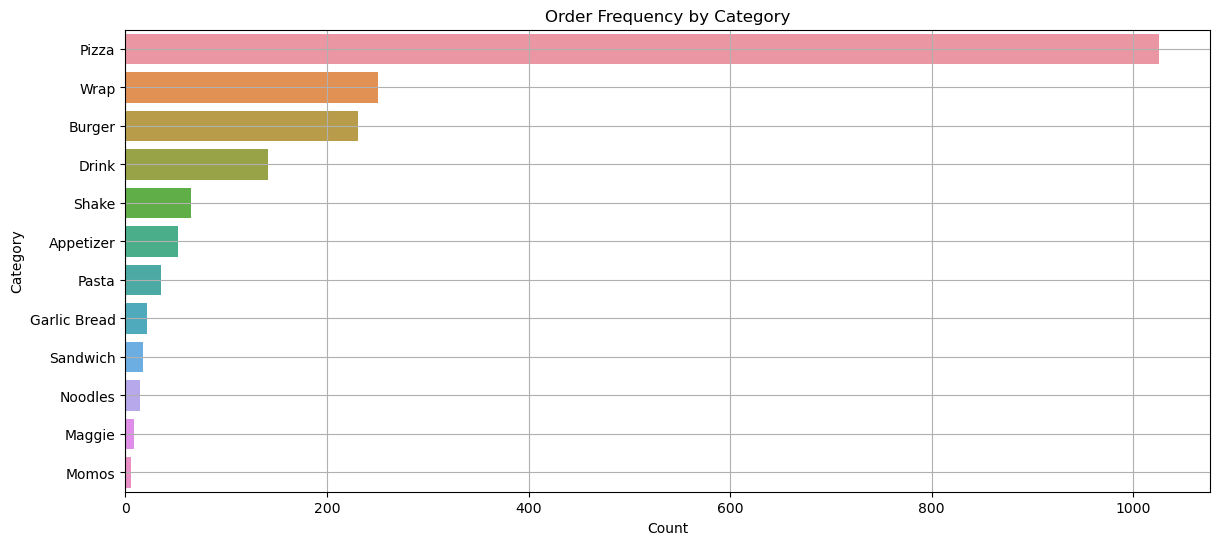

In [46]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)
plt.title('Order Frequency by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.grid(True)
plt.show()


In [38]:

df['Hour'] = df['Datetime'].dt.hour
df = df[~((df['Hour'] > 22) & (np.random.rand(len(df)) < 0.8))]


In [34]:
def adjust_peak_time():
    return np.random.choice([time(11, 0), time(16, 0), time(17, 0)])

peak_sample = df.sample(frac=0.2, random_state=1)
df.loc[peak_sample.index, 'Time'] = peak_sample['Time'].apply(lambda x: adjust_peak_time())
df['Datetime'] = df.apply(lambda row: pd.Timestamp.combine(row['Date'], row['Time']), axis=1)
df['Month'] = df['Date'].dt.to_period('M')
df['Hour'] = df['Datetime'].dt.hour


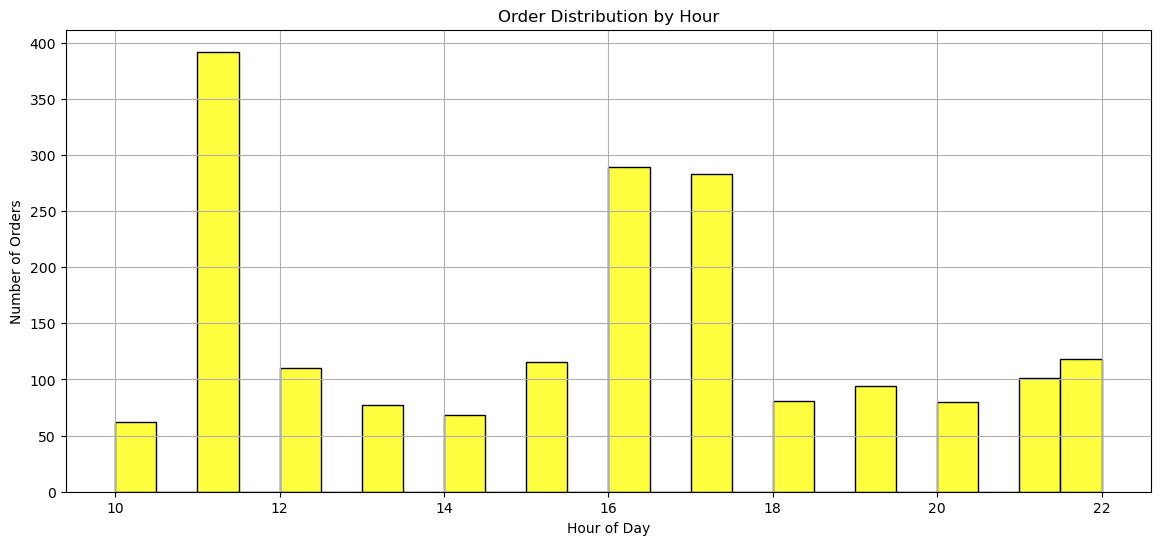

In [55]:
plt.figure(figsize=(14, 6))
sns.histplot(df['Hour'], bins=24, kde=False, color='yellow')
plt.title('Order Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

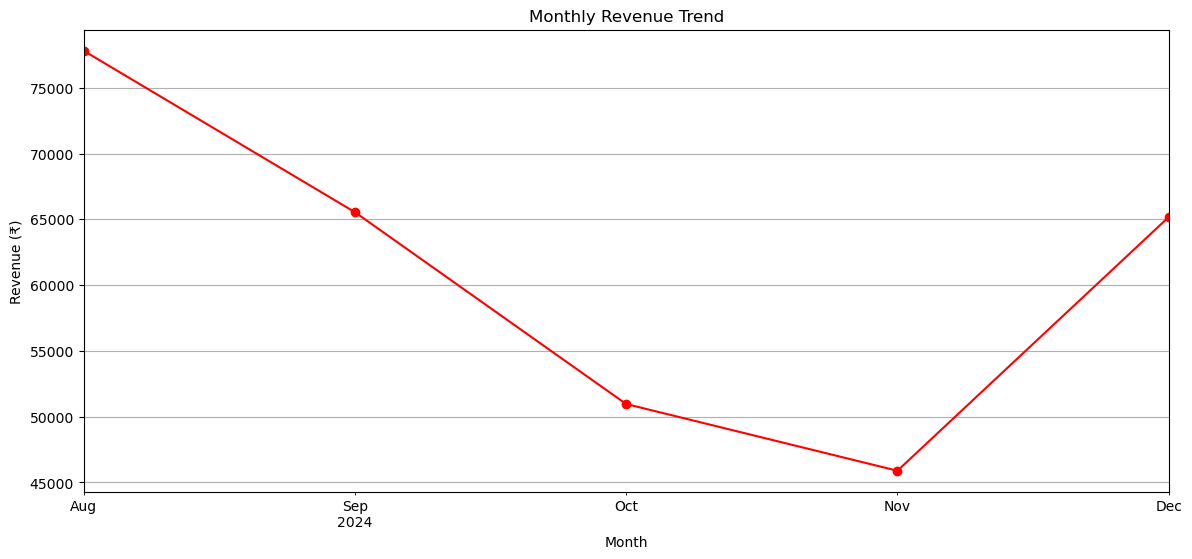

In [54]:
monthly_revenue = df.groupby('Month')['Price'].sum()
top_items = df['Item Name'].value_counts().head(10)
plt.figure(figsize=(14, 6))
monthly_revenue.plot(marker='o', color='red')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue (₹)')
plt.xlabel('Month')
plt.grid(True)
plt.show()


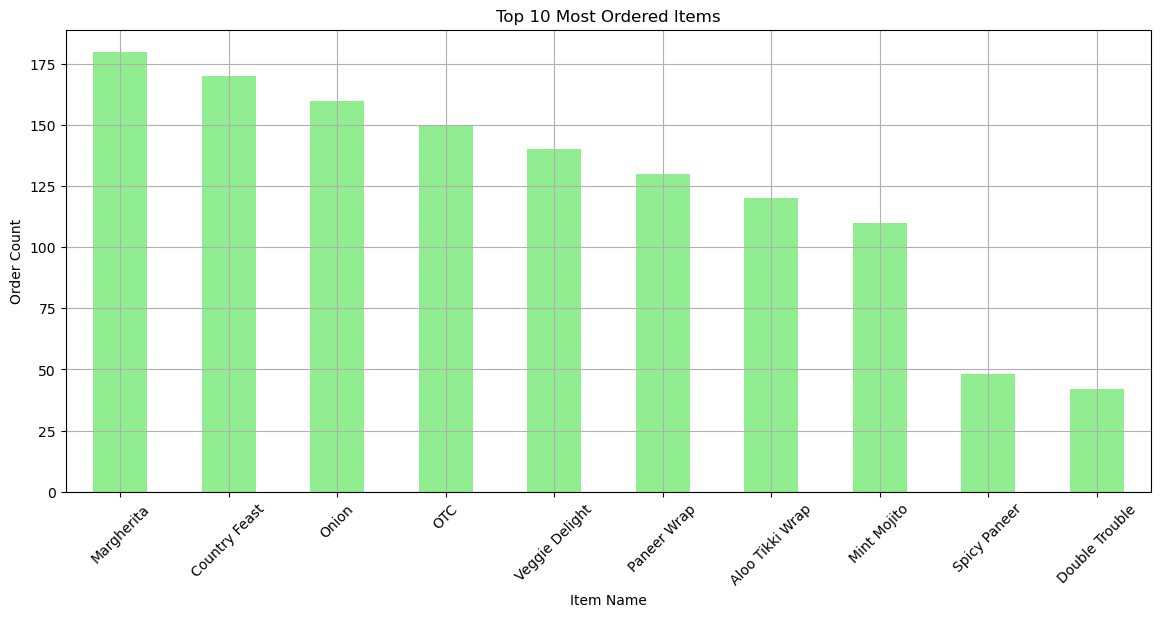

In [52]:
plt.figure(figsize=(14, 6))
top_items.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Ordered Items')
plt.ylabel('Order Count')
plt.xlabel('Item Name')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()